In [ ]:
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = horses_or_humans.load_data()
x_train1 = x_train.astype('float32') / 255.
x_test1 = x_test.astype('float32') / 255.
x_train1 = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test1 = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train1.shape)
print(x_test1.shape)

(60000, 784)
(10000, 784)


In [ ]:
x_train1 = x_train.astype('float32') / 255.0
x_test1 = x_test.astype('float32') / 255.0

In [ ]:
x_train1.shape

(60000, 28, 28)

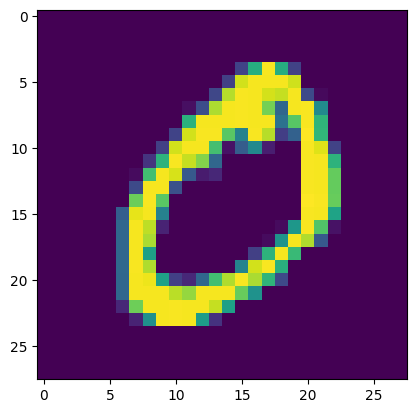

In [ ]:
img = Image.fromarray(x_train[1])
plt.imshow(img)

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

In [ ]:
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
batch_size = 256
epochs = 10
model.fit(x_train1, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 4s 16ms/step - loss: 1.0380 - accuracy: 0.8595 - val_loss: 29.6764 - val_accuracy: 0.9020
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2209 - accuracy: 0.9366 - val_loss: 19.8244 - val_accuracy: 0.9389
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1556 - accuracy: 0.9543 - val_loss: 16.5466 - val_accuracy: 0.9480
Epoch 4/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1208 - accuracy: 0.9645 - val_loss: 15.7057 - val_accuracy: 0.9525
Epoch 5/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0987 - accuracy: 0.9711 - val_loss: 14.1308 - val_accuracy: 0.9565
Epoch 6/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0822 - accuracy: 0.9759 - val_loss: 12.9860 - val_accuracy: 0.9609
Epoch 7/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0678 - accuracy: 0.9800 - val_loss: 16.8635 - val_accuracy:

In [ ]:
scores = model.evaluate(x_test1, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0807 - accuracy: 0.9755
Test loss: 0.08069916069507599
Test accuracy: 0.9754999876022339


In [ ]:
predictions = model.predict(x_test1)
predictions

313/313 [==============================] - 1s 4ms/step


array([[1.69241514e-06, 2.47897987e-07, 2.52944708e-04, ...,
        9.99559879e-01, 1.01549324e-06, 6.05127161e-06],
       [2.68423059e-06, 5.03085263e-04, 9.99052465e-01, ...,
        4.22915818e-08, 4.99482098e-07, 1.06881635e-10],
       [2.21071460e-07, 9.98444498e-01, 1.11607289e-04, ...,
        9.16230201e-04, 2.17063382e-04, 7.24652182e-06],
       ...,
       [2.61863988e-08, 1.32700393e-08, 3.99046529e-09, ...,
        4.03018157e-06, 9.44182432e-07, 8.69171636e-05],
       [1.46814943e-06, 2.77516010e-09, 6.52869936e-09, ...,
        2.08562345e-09, 2.31669110e-05, 3.48145655e-08],
       [3.29867561e-07, 2.20277840e-08, 1.06759419e-08, ...,
        7.89150689e-12, 3.42007742e-11, 3.95557233e-11]], dtype=float32)

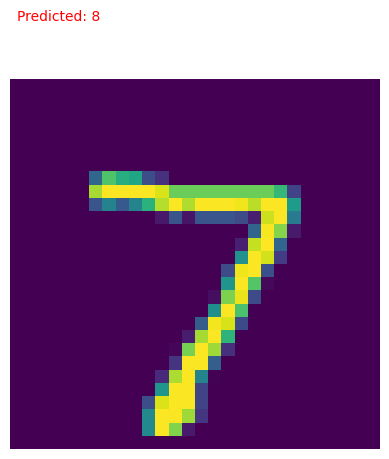

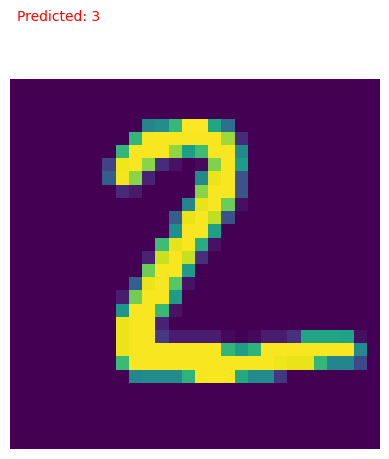

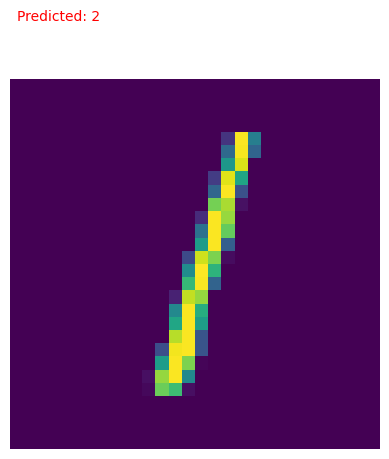

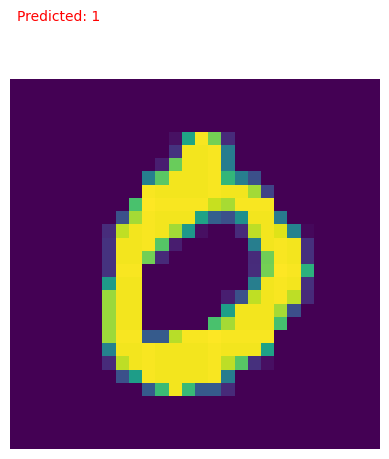

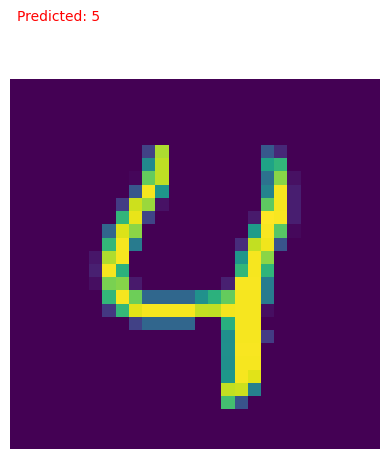

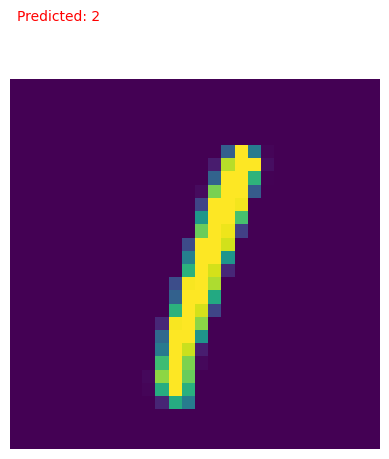

In [ ]:
classes = ['horse','human']

for i in range(6):
    img = Image.fromarray(x_test[i])
    plt.imshow(img)
    predicted_label = np.argmax(predictions[i])
    plt.text(0, -5, f"Predicted: {classes[predicted_label]}", color='red')
    plt.axis('off')
    plt.show()